In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

spotify = pd.read_csv("top10s.csv")

# Spotify Data Analysis

By : Ezekiel Suarez, Tanu Siddappa


In [25]:
# Introduction
intro_text = """
Music is a popular form of entertainment across all groups of people. In the last decade, there has been an increase in the number of genres of music and the overall composition of a "popular" song has changed. The introduction of streaming platforms has also changed how we consume music, the most popular platform being Spotify with over 500 million active users. Streaming platforms have made it easier to share music we like with our friends, create our own personalized playlists, and discover new music or genres we may enjoy.

In this analysis, we will be focusing on Spotify's Top Songs chart and analyzing factors in each song that may contribute to a song's probability to make the charts. The data contains the top 50 songs from each year, from the years 2010-2019. This dataset provides information on release year, bpm, danceability, energy, speechiness, and acousticness, which can all help in determining factors that may influence a song's popularity. We will attempt to find correlations between these factors and the charts. We are also interested in how the overall trend of these factors has shifted through the years. Some questions we are looking to answer include:

1. How does the length of a song impact a song's popularity?
2. What are the most common genres on the charts?
3. Do more lyrical or more instrumental songs perform better on the Top Songs charts?
4. Which artists are most commonly seen on Top Songs charts?
5. How has the mood of songs on the Top Songs charts shifted through the decade?
Data: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
"""

print(intro_text)



Music is a popular form of entertainment across all groups of people. In the last decade, there has been an increase in the number of genres of music and the overall composition of a "popular" song has changed. The introduction of streaming platforms has also changed how we consume music, the most popular platform being Spotify with over 500 million active users. Streaming platforms have made it easier to share music we like with our friends, create our own personalized playlists, and discover new music or genres we may enjoy.

In this analysis, we will be focusing on Spotify's Top Songs chart and analyzing factors in each song that may contribute to a song's probability to make the charts. The data contains the top 50 songs from each year, from the years 2010-2019. This dataset provides information on release year, bpm, danceability, energy, speechiness, and acousticness, which can all help in determining factors that may influence a song's popularity. We will attempt to find correla

In [22]:
#Data Description
data_text = """
There are several variables that the dataset explores about each song. These include:

1. bpm (beats per minute): The tempo of a song
2. nrgy (Energy): The energy level of a song (higher value is more energetic)
3. dnce (Danceablility): How danceable a song is (higher value is more danceable)
4. dB (Loudness): How loud a song is (higher value is louder)
5. live (Liveness): How likely a song is to be a live recording (higher value is more likely)
6. val (Valence): Positivity of a song (higher value is more positive)
7. dur (Duration): Length of a song in seconds
8. acous (Acousticness): Score for acoustic instrumentation vs digital instrumentation (higher value being more acoustic)
9. spch (Speechiness): Amount of spoken words in a song (higher value has more spoken words)
10. pop (Popularity): Popularity score of a song (higher value is more popular)
"""

print(data_text)



There are several variables that the dataset explores about each song. These include:

1. bpm (beats per minute): The tempo of a song
2. nrgy (Energy): The energy level of a song (higher value is more energetic)
3. dnce (Danceablility): How danceable a song is (higher value is more danceable)
4. dB (Loudness): How loud a song is (higher value is louder)
5. live (Liveness): How likely a song is to be a live recording (higher value is more likely)
6. val (Valence): Positivity of a song (higher value is more positive)
7. dur (Duration): Length of a song in seconds
8. acous (Acousticness): Score for acoustic instrumentation vs digital instrumentation (higher value being more acoustic)
9. spch (Speechiness): Amount of spoken words in a song (higher value has more spoken words)
10. pop (Popularity): Popularity score of a song (higher value is more popular)



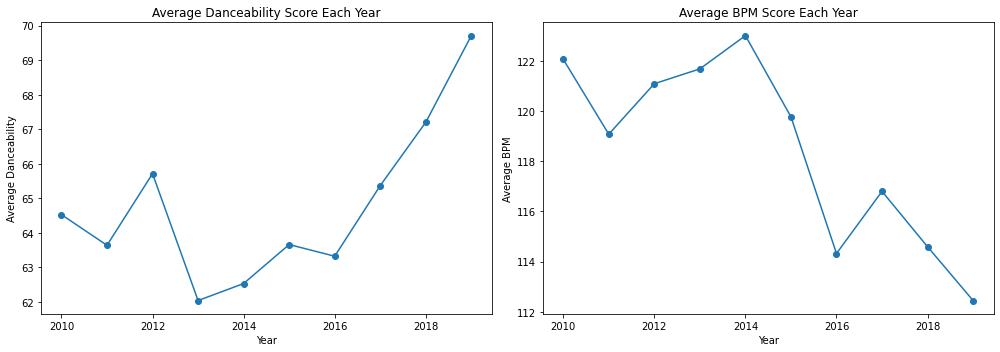

The correlation coefficient between average danceability and BPM is -38.80 with a p-value of 0.0000000. This shows that Danceability and BPM are inversely correlated

While the danceability of songs on the charts has been increasing since 2016, the average beats per minute has been decreasing overall. This is surprising, because we expect that songs with a faster tempo are more commonly danced to. This shows that over the decade, songs on the charts were more "danceable" even if they had a slower tempo than previous years. 



In [23]:
#Correlation between Danceability and BPM
avg_dance = spotify.groupby('year')['dnce'].mean().reset_index()
avg_bpm = spotify.groupby('year')['bpm'].mean().reset_index()

merged_data = pd.merge(avg_dance, avg_bpm, on='year')

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(merged_data['year'], merged_data['dnce'], marker='o')
plt.title('Average Danceability Score Each Year')
plt.xlabel('Year')
plt.ylabel('Average Danceability')

plt.subplot(1, 2, 2)
plt.plot(merged_data['year'], merged_data['bpm'], marker='o')
plt.title('Average BPM Score Each Year')
plt.xlabel('Year')
plt.ylabel('Average BPM')

plt.tight_layout()
plt.show()

correlation, p_value = ttest_ind(merged_data['dnce'], merged_data['bpm'])

print(f"The correlation coefficient between average danceability and BPM is {correlation:.2f} with a p-value of {p_value:.7f}. This shows that Danceability and BPM are inversely correlated")

dncbl_text = """
While the danceability of songs on the charts has been increasing since 2016, the average beats per minute has been decreasing overall. This is surprising, because we expect that songs with a faster tempo are more commonly danced to. This shows that over the decade, songs on the charts were more "danceable" even if they had a slower tempo than previous years. 
"""
print(dncbl_text)


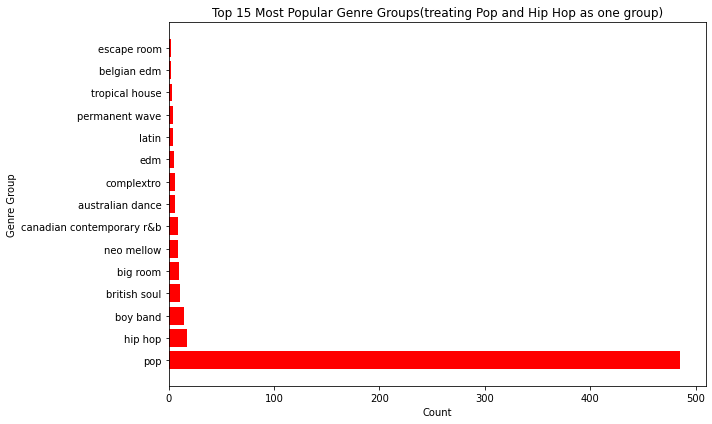


Out of the top 15 most popular genre groups, 'pop' and 'hip hop' are likely to be prominent due having multiple sub-genres. These songs are also most popular on the radio.



In [16]:
# Top 15 most popular genres
# Treating all "pop" and "hip hop" genres as one category
def assignGenre(genre):
    sort = genre.lower()
    if 'pop' in sort:
        return 'pop'
    elif 'hip hop' in sort or 'rap' in sort:
        return 'hip hop'
    else:
        return genre

spotify['genre_group'] = spotify['top genre'].apply(assignGenre)
count = spotify['genre_group'].value_counts().reset_index()
count.columns = ['genre_group', 'nums']
top15 = count.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top15['genre_group'], top15['nums'], color='red')
plt.xlabel('Count')
plt.ylabel('Genre Group')
plt.title('Top 15 Most Popular Genre Groups(treating Pop and Hip Hop as one group)')
plt.tight_layout()
plt.show()

genre_text = """
Out of the top 15 most popular genre groups, 'pop' and 'hip hop' are likely to be prominent due having multiple sub-genres. These songs are also most popular on the radio.
"""
print(genre_text)



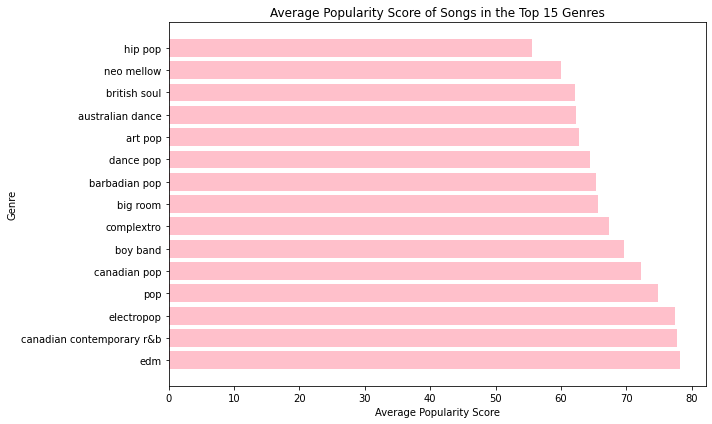


One interesting thing to note in the average popularity score is that popularity is not necessarily corelated to the top genres. Despite having the most dance pop songs on the charts, dance pop is only 11th in popularity score.EDM songs have the highest average popularity score, which could suggest that while less EDM songs make it on the charts overall, the ones that do are very successful. 



In [34]:
#Average Popularity Score in the Top 15 Genres
filtered_spotify = spotify[spotify['top genre'].isin(top_15_genres['top genre'])]
average_pop = filtered_spotify.groupby('top genre')['pop'].mean().reset_index()
average_pop_sorted = average_pop.sort_values('pop')

plt.figure(figsize=(10, 6))
plt.barh(average_pop_sorted['top genre'], average_pop_sorted['pop'], color='pink')
plt.xlabel('Average Popularity Score')
plt.ylabel('Genre')
plt.title('Average Popularity Score of Songs in the Top 15 Genres')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

pop2_text = """
One interesting thing to note in the average popularity score is that popularity is not necessarily corelated to the top genres. Despite having the most dance pop songs on the charts, dance pop is only 11th in popularity score.EDM songs have the highest average popularity score, which could suggest that while less EDM songs make it on the charts overall, the ones that do are very successful. 
"""
print(pop2_text)

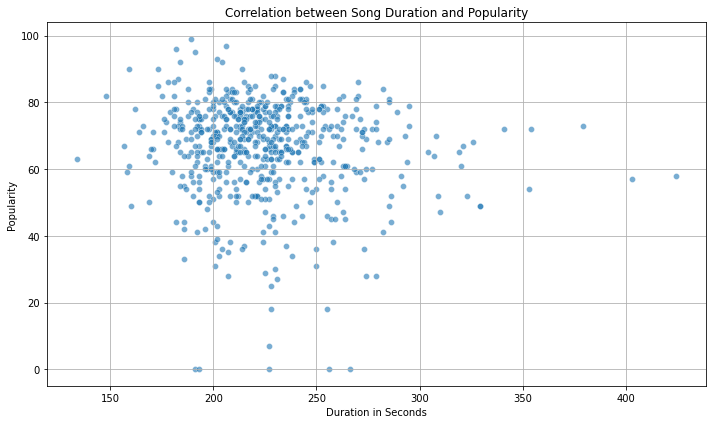


There is a cluster of points near the upper-left corner of the plot, which shows that popular songs tend to be shorter in duration (with the exception of a few outliers). This could be because of shorter songs have a better chance to go "viral" on social media. The ideal range of a song to maximize popularity seems to be around 180-210 seconds.



In [35]:
# Correlation between Song Duration and Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dur', y='pop', data=spotify, alpha=0.6)
plt.title('Correlation between Song Duration and Popularity')
plt.xlabel('Duration in Seconds')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

dur_text = """
There is a cluster of points near the upper-left corner of the plot, which shows that popular songs tend to be shorter in duration (with the exception of a few outliers). This could be because of shorter songs have a better chance to go "viral" on social media. The ideal range of a song to maximize popularity seems to be around 180-210 seconds.
"""
print(dur_text)

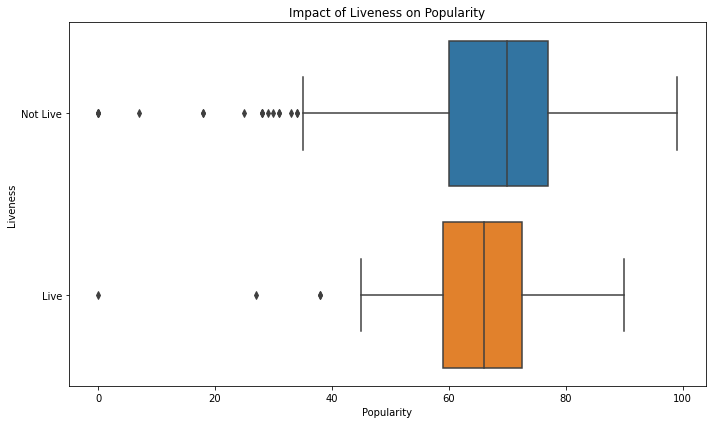

T-statistic: -1.4827272208349167
P-value: 0.1447279859557963
Fail to reject the null hypothesis: There is no significant difference in popularity between live and not live music.

For this plot, songs with a live score of 37 or more are considered "live" songs. Songs that are considerd live tend to be less average than non-live songs. Regularly recorded songs also have more spread in their popularity, and have a much larger maximum popularity score. 



In [43]:
# Popularity of songs based on Liveness
spotify['liveBinary'] = spotify['live'].apply(lambda x: 'Live' if x > 37 else 'Not Live')

plt.figure(figsize=(10, 6))
sns.boxplot(x='pop', y='liveBinary', data=spotify, orient='h')
plt.title('Impact of Liveness on Popularity')
plt.xlabel('Popularity')
plt.ylabel('Liveness')
plt.tight_layout()
plt.show()

pop_live = spotify[spotify['liveBinary'] == 'Live']['pop']
pop_not_live = spotify[spotify['liveBinary'] == 'Not Live']['pop']
t_stat, p_value = ttest_ind(pop_live, pop_not_live, equal_var=False)
alpha = 0.05
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in popularity between live and not live music.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in popularity between live and not live music.")

live_text = """
For this plot, songs with a live score of 37 or more are considered "live" songs. Songs that are considerd live tend to be less average than non-live songs. Regularly recorded songs also have more spread in their popularity, and have a much larger maximum popularity score. 
"""
print(live_text)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Pitbull             11
Shawn Mendes        11
The Chainsmokers    11
Ed Sheeran          11
Calvin Harris       10
Adele               10
Jennifer Lopez      10
OneRepublic          9
Kesha                9
Name: artist, dtype: int64


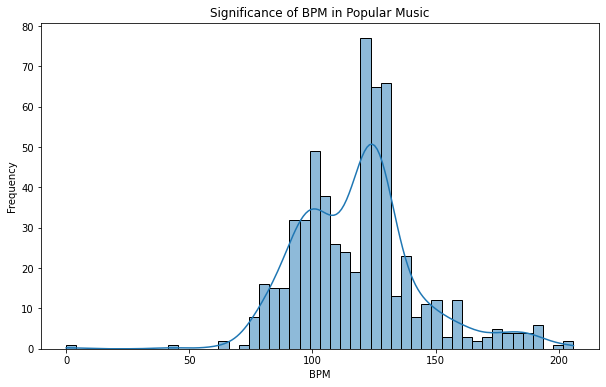


Based on the beats per minute of the previous decade's charting songs, 100 or 120-130 BPM seems to be a solid tempo. This would make for a medium-high pace which makes sense when thinking about the pop genre and what it should sound like.



In [25]:
# Top 15 Artists on Charts
artist_counts = spotify['artist'].value_counts()
top_15_artists = artist_counts.head(15)
print(top_15_artists)

plt.figure(figsize=(10, 6))
sns.histplot(spotify['bpm'], bins=50, kde=True)
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.title('Significance of BPM in Popular Music')
plt.show()

bpm_text = """
Based on the beats per minute of the previous decade's charting songs, 100 or 120-130 BPM seems to be a solid tempo. This would make for a medium-high pace which makes sense when thinking about the pop genre and what it should sound like.
"""
print(bpm_text)


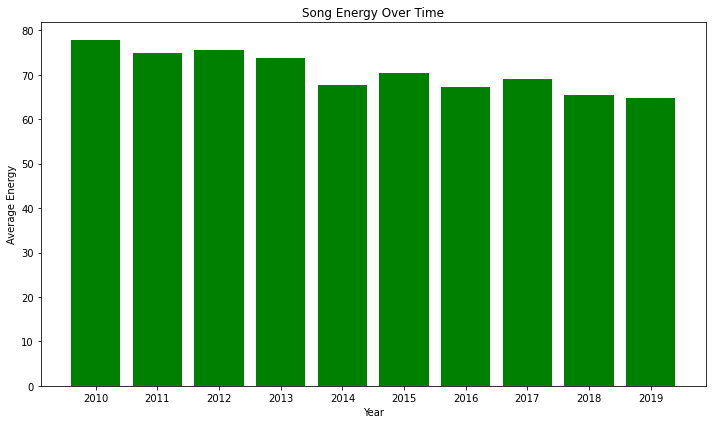


Between 2010 and 2020, song "energy" has decreased which probably means culture as a whole may have gotten more depressive. Sad musicians such as Mitski, Lana Del Ray, and Billie Eilish seem to be in the perfect spot right now.



In [38]:
# Song Energy Over Time
nrgy_vs_year = spotify.groupby('year')['nrgy'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(nrgy_vs_year['year'], nrgy_vs_year['nrgy'], color='green')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.title('Song Energy Over Time')
plt.xticks(nrgy_vs_year['year'])
plt.tight_layout()
plt.show()

nrgy_text = """
Between 2010 and 2020, song "energy" has decreased which probably means culture as a whole may have gotten more depressive. Sad musicians such as Mitski, Lana Del Ray, and Billie Eilish seem to be in the perfect spot right now.
"""
print(nrgy_text)

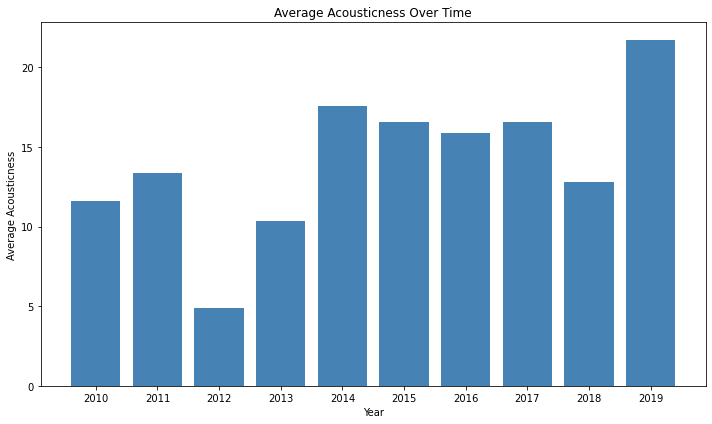


Additionally acoustics have risen dramatically, which can be linked to a quickly changing cultural landscape. These sadder musicians sound more endearing on an acoustic guitar than a MIDI drum loop. Additionally, I think the dramatic change from 2012 to 2014 has to do with the folk scene where bands like The Postal Service, Of Monsters and Men, and Hozier were starting to make an impact.



In [27]:
# Acousticness Over Time
acous_vs_year = spotify.groupby('year')['acous'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(acous_vs_year['year'], acous_vs_year['acous'], color='steelblue')
plt.xlabel('Year')
plt.ylabel('Average Acousticness')
plt.title('Average Acousticness Over Time')
plt.xticks(acous_vs_year['year'])
plt.tight_layout()
plt.show()

acous_text = """
Additionally acoustics have risen dramatically, which can be linked to a quickly changing cultural landscape. These sadder musicians sound more endearing on an acoustic guitar than a MIDI drum loop. Additionally, I think the dramatic change from 2012 to 2014 has to do with the folk scene where bands like The Postal Service, Of Monsters and Men, and Hozier were starting to make an impact.
"""
print(acous_text)

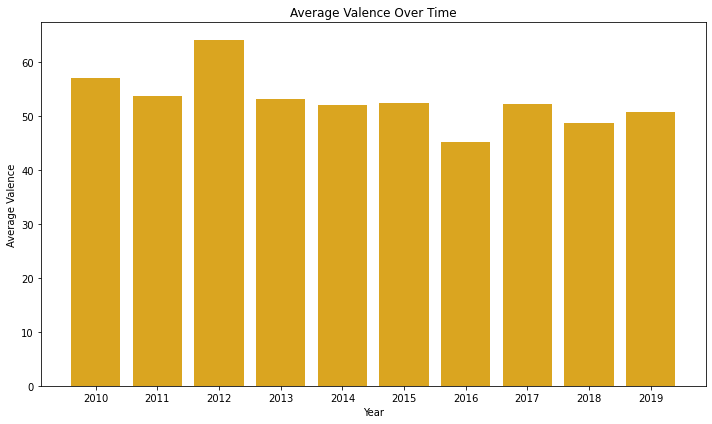


Emotional content has gotten slightly more depressive as guessed, but the happiness of the most in-your-face songs like HAPPY by Pharrell Williams or Can't Stop the Feeling by Justin Timberlake seem to boost scores here.



In [28]:
# Valence Over Time
val_vs_year = spotify.groupby('year')['val'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(val_vs_year['year'], val_vs_year['val'], color='goldenrod')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.title('Average Valence Over Time')
plt.xticks(val_vs_year['year'])
plt.tight_layout()
plt.show()

val_text = """
Emotional content has gotten slightly more depressive as guessed, but the happiness of the most in-your-face songs like HAPPY by Pharrell Williams or Can't Stop the Feeling by Justin Timberlake seem to boost scores here.
"""
print(val_text)

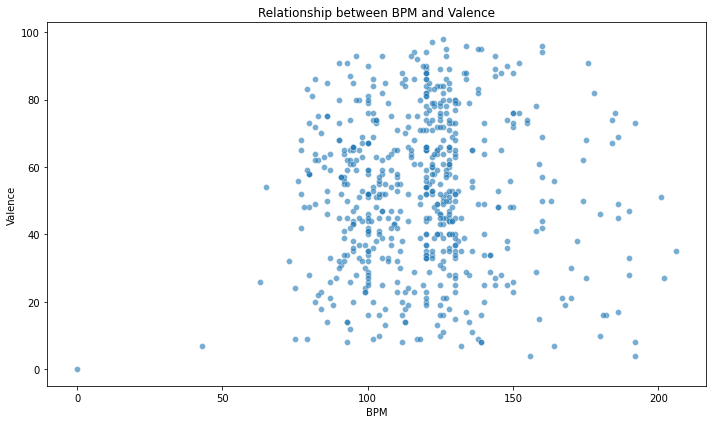


Surprisingly, beats per minute and happiness of songs have little-to-no correlation and it cannot be said that to have a happy song, it has to be fast or to have a sad song, it has to be slow.



In [39]:
# Energy vs Valence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bpm', y='val', data=spotify, alpha=0.6)
plt.xlabel('BPM')
plt.ylabel('Valence')
plt.title('Relationship between BPM and Valence')
plt.tight_layout()
plt.show()

nrgyVal_text = """
Surprisingly, beats per minute and happiness of songs have little-to-no correlation and it cannot be said that to have a happy song, it has to be fast or to have a sad song, it has to be slow.
"""
print(nrgyVal_text)

In [30]:
# Includes Featured Artists
feat_songs = spotify[spotify['title'].str.contains('feat', case=False, na=False)]

total_songs = len(spotify)
songs_with_feat = len(feat_songs)
percentage_with_feat = (songs_with_feat / total_songs) * 100

print(f"{percentage_with_feat:.2f}%")

feat_text = """
Under 15% of songs overall have featured artists meaning unless the featured is more popular than the main artist, features are not very important to chartability. HOWEVER, dance pop usually will have a feature due to the nature of dance music. DJ Khaled, Marshmallow, or Skrillex will not be singing, so they need to hire people to sing over their beats.
"""
print(feat_text)

13.60%

Under 15% of songs overall have featured artists meaning unless the featured is more popular than the main artist, features are not very important to chartability. HOWEVER, dance pop usually will have a feature due to the nature of dance music. DJ Khaled, Marshmallow, or Skrillex will not be singing, so they need to hire people to sing over their beats.



In [31]:
# Dance Pop[ularity]
dance_pop_songs = spotify[spotify['top genre'].str.contains('dance pop', case=False, na=False)]

total_songs = len(spotify)
songs_with_dance_pop = len(dance_pop_songs)
percentage_with_dance_pop = (songs_with_dance_pop / total_songs) * 100

print(f"{percentage_with_dance_pop:.2f}%")

dncePop_text = """
Dance pop takes up a whopping 54% of the 2010s music charts, showing the impact of following a trend. If people want a certain sound, they are going to listen to it even if it has already been done 327 times. Rap and hip hop have a surprisingly low amount of songs, even though it is definitely heard on the radio. This means that rapping has become more of a norm in pop music and is less of the independent genre it used to be. "hip pop", "atl hip hop", and "hip hop" only made it to positions 14, 15, and 18 respectively.
"""
print(dncePop_text)

top_5_genres = genre_counts.head(5)
print(top_5_genres)

54.23%

Dance pop takes up a whopping 54% of the 2010s music charts, showing the impact of following a trend. If people want a certain sound, they are going to listen to it even if it has already been done 327 times. Rap and hip hop have a surprisingly low amount of songs, even though it is definitely heard on the radio. This means that rapping has become more of a norm in pop music and is less of the independent genre it used to be. "hip pop", "atl hip hop", and "hip hop" only made it to positions 14, 15, and 18 respectively.

       top genre  nums
0      dance pop   327
1            pop    60
2   canadian pop    34
3  barbadian pop    15
4       boy band    15


In [32]:
# Conclusion
print("""
Music is everchanging and people often are as well. A popular song is often easy to listen to, and will have some amount of familiarity mixed with a bit of fresh new noise. We can gather from the last decade that year by year, not much drastically will change, but depending on current events, certain moods or tempos may be more gravitated toward.

In the last decade, there was a decrease in the average BPM of songs on the charts, meaning that more slow-paced songs were on the charts. The most popular songs also tended to be shorter in duration. Pop was prevalent on the charts throughout the decade, and was the most popular genre on the charts by far. Live songs also tended to have less spread in their popularity than non-live songs. This could be because of the studio finish of live songs, and their radio presence. From all of these plots, we can predict that shorter pop songs that are medium paced will be successful on Spotify's charts. 
""")


Music is everchanging and people often are as well. A popular song is often easy to listen to, and will have some amount of familiarity mixed with a bit of fresh new noise. We can gather from the last decade that year by year, not much drastically will change, but depending on current events, certain moods or tempos may be more gravitated toward.

In the last decade, there was a decrease in the average BPM of songs on the charts, meaning that more slow-paced songs were on the charts. The most popular songs also tended to be shorter in duration. Pop was prevalent on the charts throughout the decade, and was the most popular genre on the charts by far. Live songs also tended to have less spread in their popularity than non-live songs. This could be because of the studio finish of live songs, and their radio presence. From all of these plots, we can predict that shorter pop songs that are medium paced will be successful on Spotify's charts. 

